In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn 
from sklearn import neighbors
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [14]:
# Save variables
X = pd.DataFrame(music[['duration','loudness']])
Y = pd.DataFrame(music['bpm'])

In [15]:
# Fit KNN Model (unweighted by distance)
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X, Y)
y_pred = knn.predict(X)
# Create new dataframe to compare predictions
comp = pd.DataFrame(Y)
comp.columns = ['Actual']
comp['Predicted'] = y_pred

Text(0.5, 1.0, 'Actual vs. Predicted Results')

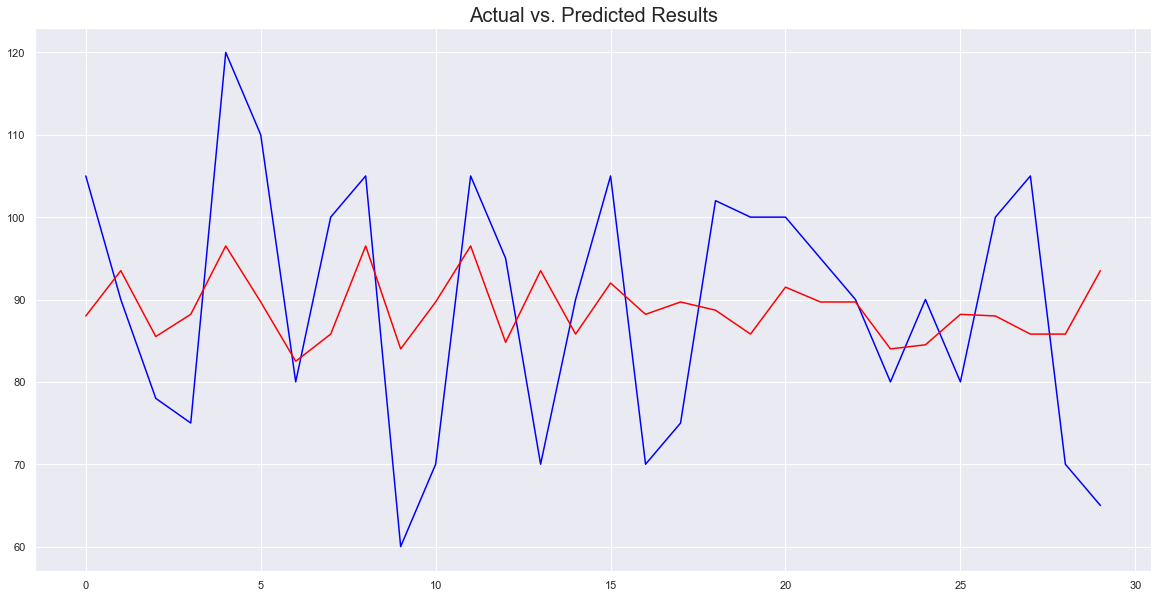

In [16]:
# Plot actual vs predicted results
sns.set(style='darkgrid')
f=plt.figure(figsize=(20,10))
plt.plot(comp['Actual'],color='blue')
plt.plot(comp['Predicted'],color='red')
plt.title("Actual vs. Predicted Results",size=20)

In [17]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: -0.35 (+/- 0.68)


In [18]:
# Fit KNN Model
knn = neighbors.KNeighborsRegressor(n_neighbors=10,weights='distance')
knn.fit(X, Y)
y_pred = knn.predict(X)
# Create new dataframe to compare predictions
comp['Predicted'] = y_pred

Text(0.5, 1.0, 'Actual vs. Predicted Results')

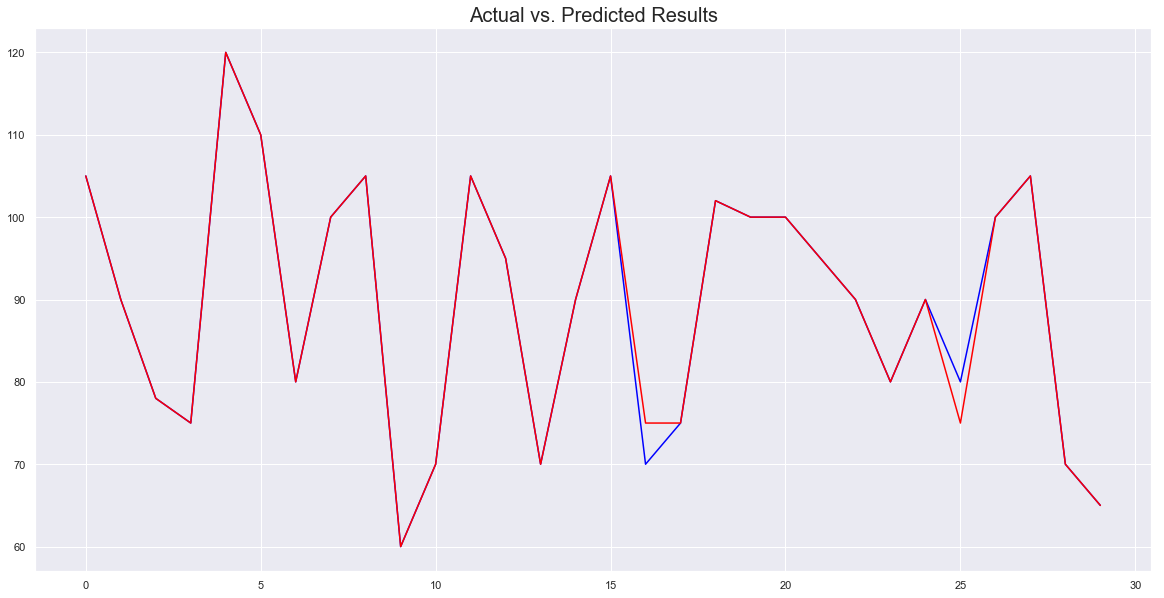

In [19]:
sns.set(style='darkgrid')
f=plt.figure(figsize=(20,10))
plt.plot(comp['Actual'],color='blue')
plt.plot(comp['Predicted'],color='red')
plt.title("Actual vs. Predicted Results",size=20)

In [20]:
score = cross_val_score(knn, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: -0.25 (+/- 0.75)
